In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
healthcare_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
print(healthcare_data.shape)
print('Dataset has {} rows and {} columns'.format(healthcare_data.shape[0], healthcare_data.shape[1]))
healthcare_data.head()

(5110, 12)
Dataset has 5110 rows and 12 columns


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
healthcare_data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [4]:
healthcare_data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

# Data cleaning

# series showing True for Duplicated, False for not Duplicated 

In [5]:
healthcare_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool

# Showing total duplicated rows 

In [6]:
healthcare_data.duplicated().sum()

0

# Exploring missing values in the data by columns

In [7]:
healthcare_data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
healthcare_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# dropping missing values

In [9]:
healthcare_data_no_missing = healthcare_data.dropna()

In [10]:
healthcare_data_no_missing.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [11]:
healthcare_data_no_missing.shape

(4909, 12)

# Filling Missing value using variable mean

In [12]:
healthcare_data_no_missing1=healthcare_data.fillna(healthcare_data.mean())
healthcare_data_no_missing1.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
healthcare_data_no_missing1.shape

(5110, 12)

# Creating subset data of numeric variable only

In [14]:
numerical_variable_df = healthcare_data_no_missing1.select_dtypes(exclude=['object'])
numerical_variable_df.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

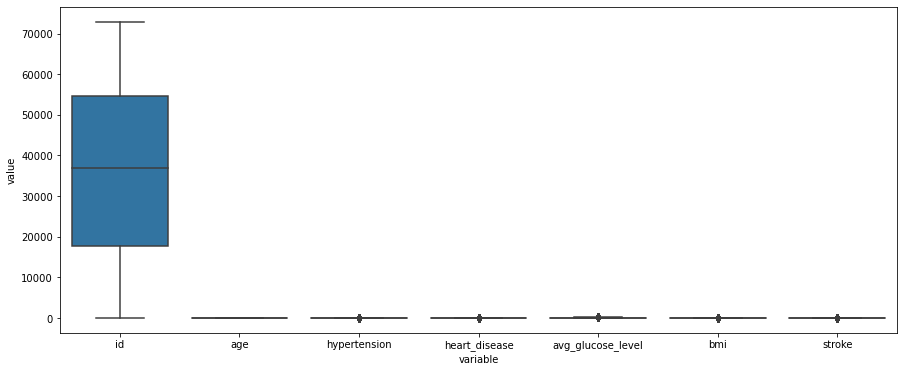

In [15]:
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
df = pd.DataFrame(data = numerical_variable_df, columns = numerical_variable_df.columns)

sns.boxplot(x="variable", y="value",ax=ax, data=pd.melt(df))

plt.show()

# Logtransforming numeric variables to reduces outliers 

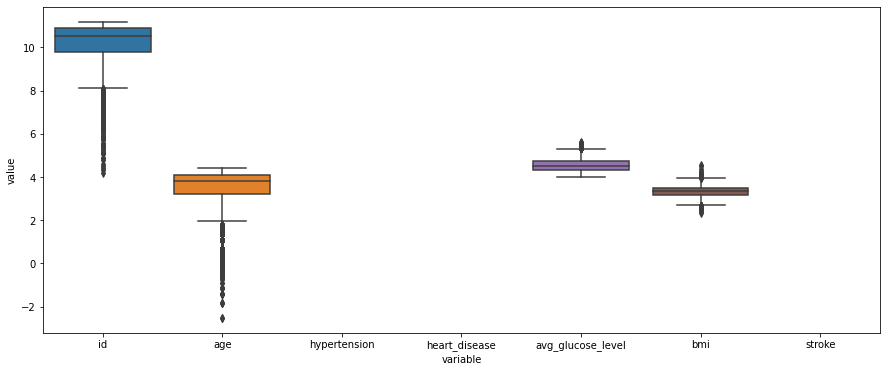

In [16]:
for c in numerical_variable_df:
    numerical_variable_df[c] = np.log(numerical_variable_df[c])
fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
df = pd.DataFrame(data = numerical_variable_df, columns = numerical_variable_df.columns)

sns.boxplot(x="variable", y="value",ax=ax, data=pd.melt(df))

plt.show()

In [3]:
healthcare_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [17]:
healthcare_data_no_missing1['hypertension']=healthcare_data_no_missing1['hypertension'].replace(0,'No')

In [18]:
healthcare_data_no_missing1['hypertension']=healthcare_data_no_missing1['hypertension'].replace(1,'Yes')

In [19]:
healthcare_data_no_missing1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,No,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,No,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,No,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,Yes,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,Yes,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,No,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,No,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,No,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [20]:
healthcare_data_no_missing1['heart_disease']=healthcare_data_no_missing1['heart_disease'].replace(0,'No')

In [21]:
healthcare_data_no_missing1['heart_disease']=healthcare_data_no_missing1['heart_disease'].replace(1,'Yes')

In [22]:
healthcare_data_no_missing1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,Yes,No,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,44873,Female,81.0,No,No,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,19723,Female,35.0,No,No,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,37544,Male,51.0,No,No,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


# Frequency distribution of gender

In [23]:
healthcare_data_no_missing1.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

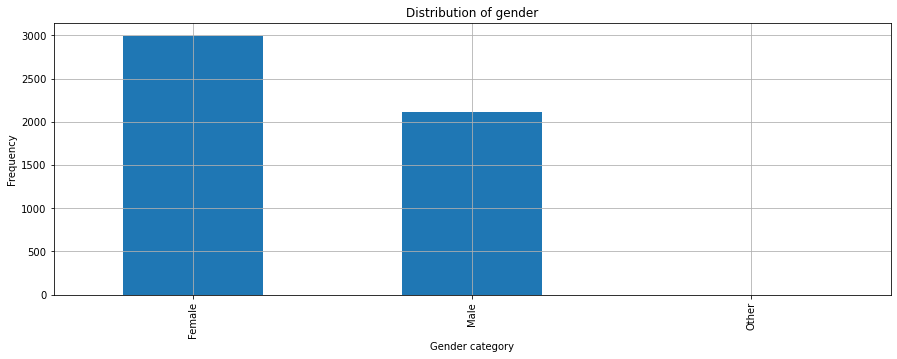

In [24]:
healthcare_data_no_missing1.gender.value_counts().plot.bar(figsize=(15,5))
plt.title('Distribution of gender')
plt.xlabel('Gender category')
plt.ylabel('Frequency')
plt.grid()

In [45]:
healthcare_data_no_missing1.gender.value_counts(normalize=True)*100

Female    58.590998
Male      41.389432
Other      0.019569
Name: gender, dtype: float64

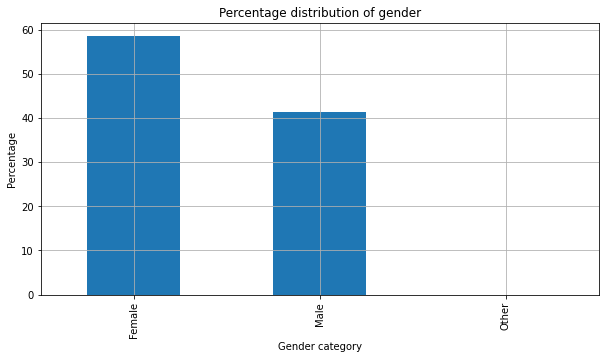

In [47]:
(healthcare_data_no_missing1.gender.value_counts(normalize=True)*100).plot.bar(figsize=(10,5))
plt.title('Percentage distribution of gender')
plt.xlabel('Gender category')
plt.ylabel('Percentage')
plt.grid()

# Frequency distribution of hypertension

In [11]:
healthcare_data_no_missing1.hypertension.value_counts()

No     4612
Yes     498
Name: hypertension, dtype: int64

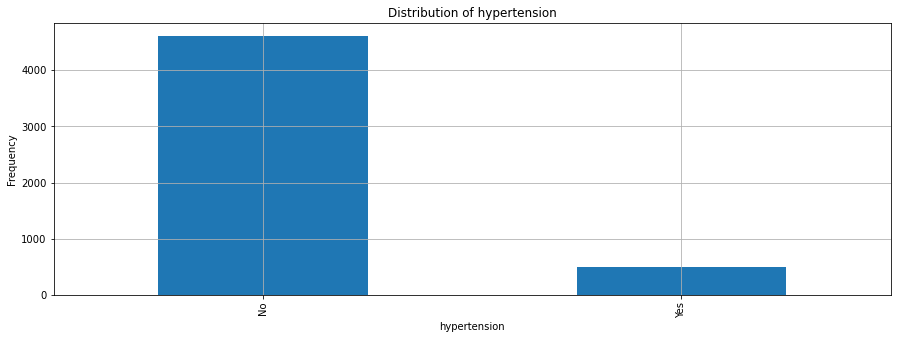

In [22]:
healthcare_data_no_missing1.hypertension.value_counts().plot.bar(figsize=(15,5))
plt.title('Distribution of hypertension')
plt.xlabel('hypertension')
plt.ylabel('Frequency')
plt.grid()

In [48]:
healthcare_data_no_missing1.hypertension.value_counts(normalize=True)*100

No     90.254403
Yes     9.745597
Name: hypertension, dtype: float64

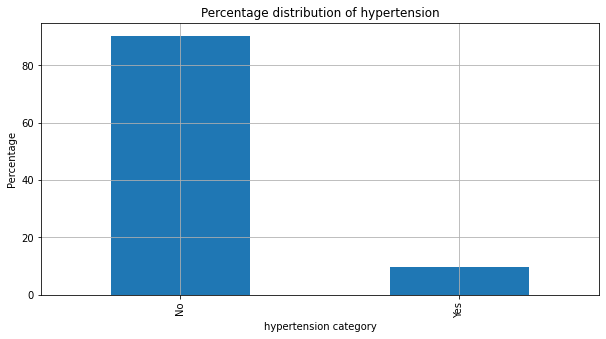

In [49]:
(healthcare_data_no_missing1.hypertension.value_counts(normalize=True)*100).plot.bar(figsize=(10,5))
plt.title('Percentage distribution of hypertension')
plt.xlabel('hypertension category')
plt.ylabel('Percentage')
plt.grid()

# Frequency distribution of heart disease

In [23]:
healthcare_data_no_missing1.heart_disease.value_counts()

No     4834
Yes     276
Name: heart_disease, dtype: int64

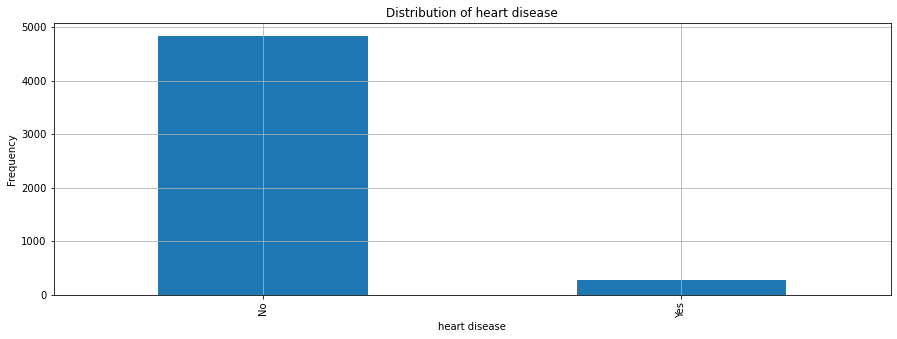

In [24]:
healthcare_data_no_missing1.heart_disease.value_counts().plot.bar(figsize=(15,5))
plt.title('Distribution of heart disease')
plt.xlabel('heart disease')
plt.ylabel('Frequency')
plt.grid()

In [50]:
healthcare_data_no_missing1.heart_disease.value_counts(normalize=True)*100

No     94.598826
Yes     5.401174
Name: heart_disease, dtype: float64

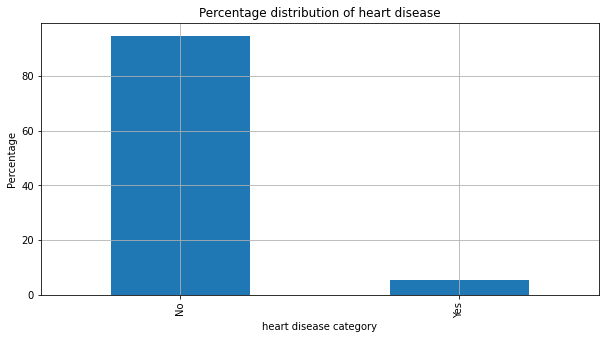

In [51]:
(healthcare_data_no_missing1.heart_disease.value_counts(normalize=True)*100).plot.bar(figsize=(10,5))
plt.title('Percentage distribution of heart disease')
plt.xlabel('heart disease category')
plt.ylabel('Percentage')
plt.grid()

# Frequency distribution of marriage

In [25]:
healthcare_data_no_missing1.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

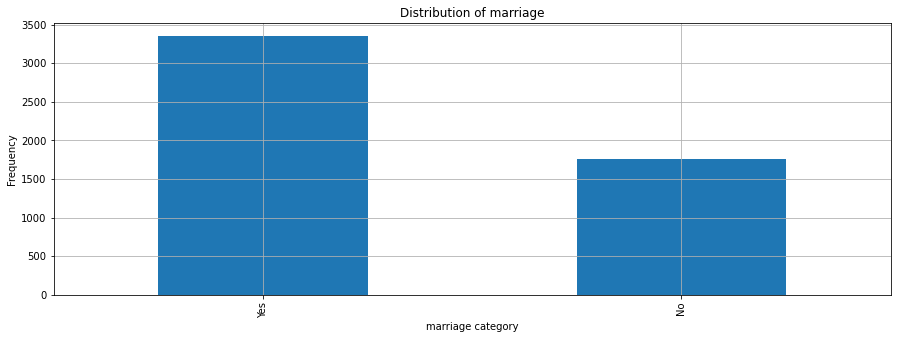

In [27]:
healthcare_data_no_missing1.ever_married.value_counts().plot.bar(figsize=(15,5))
plt.title('Distribution of marriage')
plt.xlabel('marriage category')
plt.ylabel('Frequency')
plt.grid()

In [52]:
healthcare_data_no_missing1.ever_married.value_counts(normalize=True)*100

Yes    65.616438
No     34.383562
Name: ever_married, dtype: float64

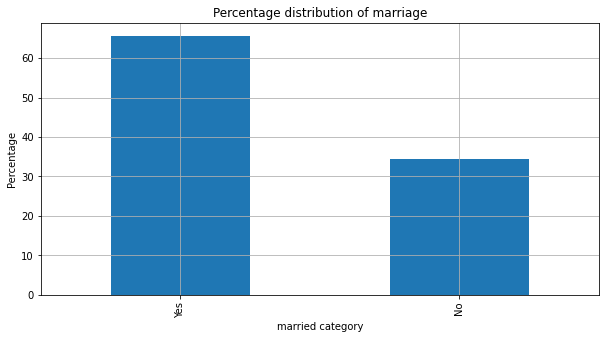

In [53]:
(healthcare_data_no_missing1.ever_married.value_counts(normalize=True)*100).plot.bar(figsize=(10,5))
plt.title('Percentage distribution of marriage')
plt.xlabel('married category')
plt.ylabel('Percentage')
plt.grid()

# Frequency distribution of work type

In [28]:
healthcare_data_no_missing1.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

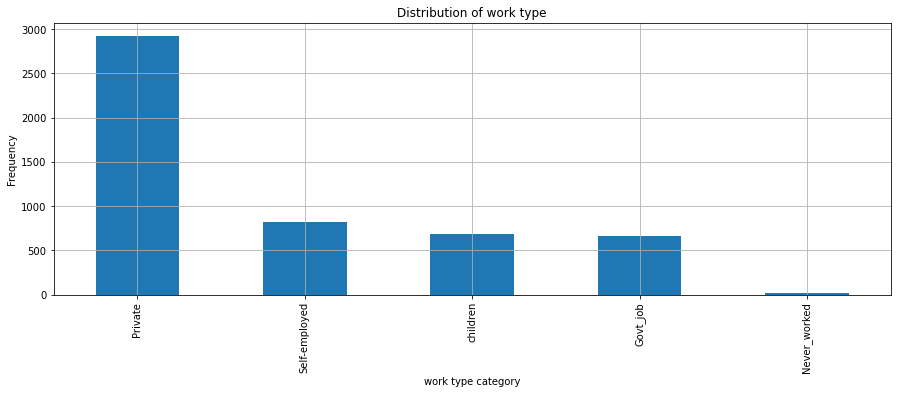

In [29]:
healthcare_data_no_missing1.work_type.value_counts().plot.bar(figsize=(15,5))
plt.title('Distribution of work type')
plt.xlabel('work type category')
plt.ylabel('Frequency')
plt.grid()

In [54]:
healthcare_data_no_missing1.work_type.value_counts(normalize=True)*100

Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: work_type, dtype: float64

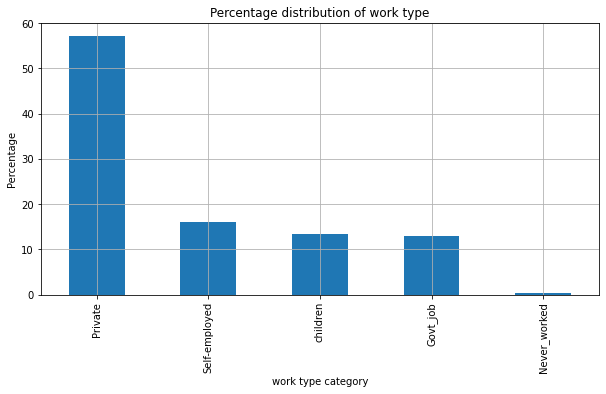

In [55]:
(healthcare_data_no_missing1.work_type.value_counts(normalize=True)*100).plot.bar(figsize=(10,5))
plt.title('Percentage distribution of work type')
plt.xlabel('work type category')
plt.ylabel('Percentage')
plt.grid()

# Frequency distribution of residence type

In [31]:
healthcare_data_no_missing1.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

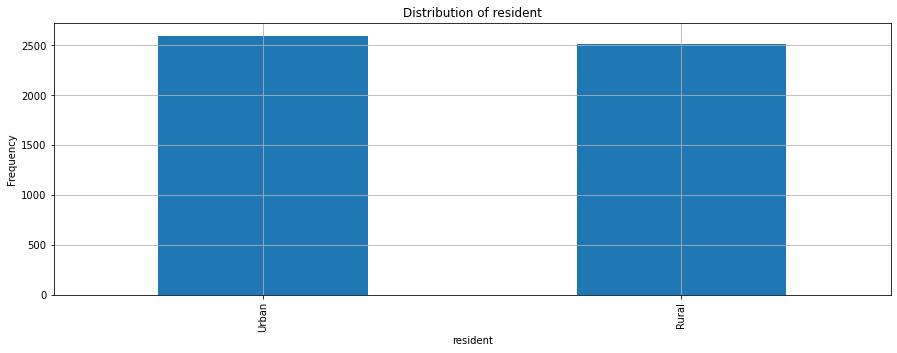

In [32]:
healthcare_data_no_missing1.Residence_type.value_counts().plot.bar(figsize=(15,5))
plt.title('Distribution of resident')
plt.xlabel('resident')
plt.ylabel('Frequency')
plt.grid()

In [56]:
healthcare_data_no_missing1.Residence_type.value_counts(normalize=True)*100

Urban    50.802348
Rural    49.197652
Name: Residence_type, dtype: float64

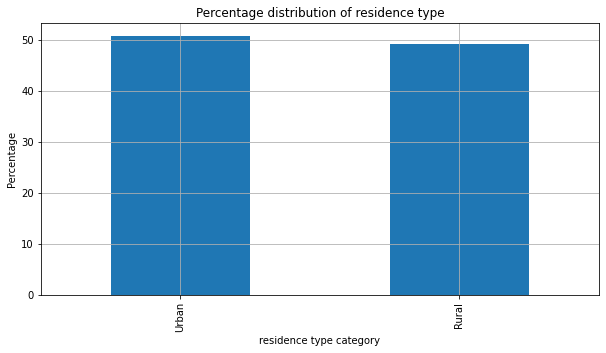

In [57]:
(healthcare_data_no_missing1.Residence_type.value_counts(normalize=True)*100).plot.bar(figsize=(10,5))
plt.title('Percentage distribution of residence type')
plt.xlabel('residence type category')
plt.ylabel('Percentage')
plt.grid()

# Frequency distribution of smokers

In [33]:
healthcare_data_no_missing1.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

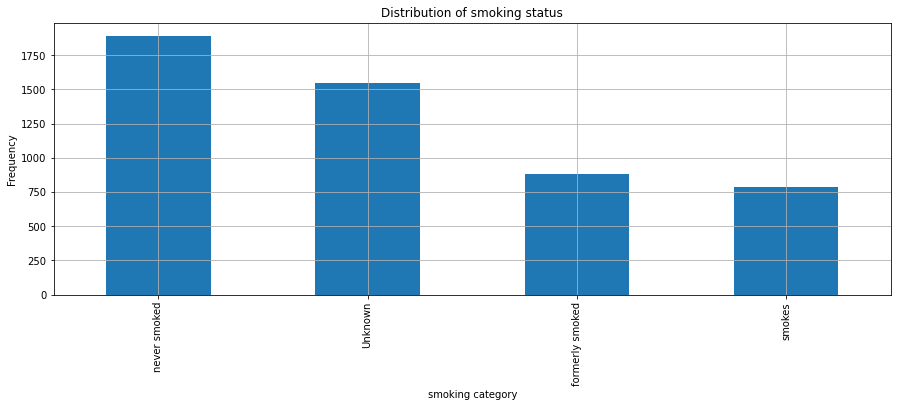

In [34]:
healthcare_data_no_missing1.smoking_status.value_counts().plot.bar(figsize=(15,5))
plt.title('Distribution of smoking status')
plt.xlabel('smoking category')
plt.ylabel('Frequency')
plt.grid()

In [58]:
healthcare_data_no_missing1.smoking_status.value_counts(normalize=True)*100

never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: smoking_status, dtype: float64

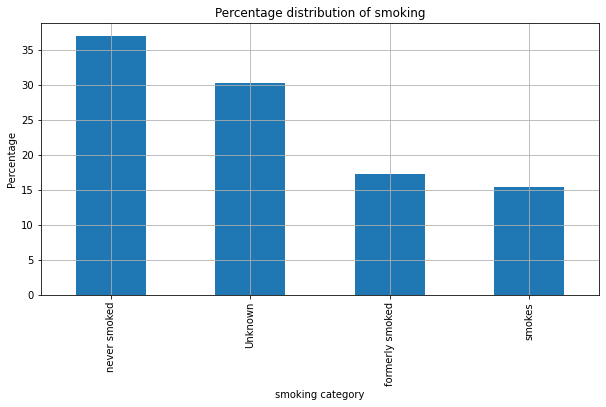

In [59]:
(healthcare_data_no_missing1.smoking_status.value_counts(normalize=True)*100).plot.bar(figsize=(10,5))
plt.title('Percentage distribution of smoking')
plt.xlabel('smoking category')
plt.ylabel('Percentage')
plt.grid()

In [25]:
healthcare_data_no_missing1.describe()

,id,age,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,106.147677,28.893237,0.048728
std,21161.721625,22.612647,45.283560,7.698018,0.215320
min,67.000000,0.080000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,271.740000,97.600000,1.000000


In [25]:
healthcare_data_no_missing1.groupby(['gender'])[['age','avg_glucose_level','bmi','stroke']].mean()

,age,avg_glucose_level,bmi,stroke
gender,,,,
Female,43.757395,104.057809,29.060168,0.047094
Male,42.483385,109.088520,28.659998,0.051064
Other,26.000000,143.330000,22.400000,0.000000


In [26]:
healthcare_data_no_missing1.groupby(['gender','Residence_type'])[['age','avg_glucose_level','bmi','stroke']].mean()

age  avg_glucose_level        bmi    stroke
gender Residence_type                                                   
Female Rural           43.294526         104.056860  29.039528  0.043686
       Urban           44.200889         104.058718  29.079944  0.050360
Male   Rural           42.366565         109.580830  28.697184  0.047710
       Urban           42.598126         108.604977  28.623475  0.054358
Other  Rural           26.000000         143.330000  22.400000  0.000000

In [31]:
healthcare_data_no_missing1.groupby(['gender','hypertension','heart_disease'])[['age','avg_glucose_level','bmi','stroke']].mean()

age  avg_glucose_level        bmi  \
gender hypertension heart_disease                                            
Female No           No             40.907229         100.422756  28.661073   
                    Yes            68.654762         138.406667  29.866023   
       Yes          No             62.368421         125.043846  32.860586   
                    Yes            72.000000         155.984483  30.605731   
Male   No           No             38.420034         104.724595  28.070467   
                    Yes            66.687500         128.582578  29.829465   
       Yes          No             59.229947         129.791658  32.874107   
                    Yes            69.400000         147.248571  31.596950   
Other  No           No             26.000000         143.330000  22.400000   

                                     stroke  
gender hypertension heart_disease            
Female No           No             0.034169  
                    Yes            0.142857  
       Yes          No             0.129555  
                    Yes            0.241379  
Male   No           No             0.033428  
                    Yes            0.171875  
       Yes          No             0.112299  
                    Yes            0.171429  
Other  No           No             0.000000

In [28]:
healthcare_data_no_missing1.groupby(['gender','smoking_status'])[['avg_glucose_level','stroke']].mean()

avg_glucose_level    stroke
gender smoking_status                              
Female Unknown                  98.049306  0.029904
       formerly smoked         104.599874  0.071279
       never smoked            106.793263  0.051261
       smokes                  107.161062  0.042035
Male   Unknown                 101.434407  0.031073
       formerly smoked         122.522629  0.088452
       never smoked            108.975852  0.040724
       smokes                  109.166053  0.068249
Other  formerly smoked         143.330000  0.000000

In [29]:
healthcare_data_no_missing1.groupby(['gender','heart_disease'])[['avg_glucose_level','stroke']].mean()

avg_glucose_level    stroke
gender heart_disease                             
Female No                    102.533624  0.042346
       Yes                   142.917788  0.168142
Male   No                    107.125999  0.040984
       Yes                   132.590613  0.171779
Other  No                    143.330000  0.000000

In [30]:
healthcare_data_no_missing1.groupby(['heart_disease','smoking_status'])[['age','avg_glucose_level','stroke']].mean()

age  avg_glucose_level    stroke
heart_disease smoking_status                                         
No            Unknown          28.973930          98.338483  0.026070
              formerly smoked  53.641089         109.965359  0.071782
              never smoked     45.638180         106.316232  0.043285
              smokes           45.523352         105.912665  0.037088
Yes           Unknown          69.375000         138.966875  0.166667
              formerly smoked  68.454545         143.534675  0.155844
              never smoked     68.900000         132.422889  0.133333
              smokes           65.868852         133.136721  0.245902

In [44]:
healthcare_data_no_missing1.groupby(['hypertension','smoking_status']).mean()

id        age  avg_glucose_level  \
hypertension smoking_status                                                
No           Unknown          35896.347855  29.134718          98.478706   
             formerly smoked  36762.228758  53.258824         108.825111   
             never smoked     37011.600602  44.505422         104.402464   
             smokes           36239.838849  45.753957         106.605727   
Yes          Unknown          35976.346154  61.653846         131.818269   
             formerly smoked  37623.283333  65.583333         138.774750   
             never smoked     35556.237069  62.767241         130.137155   
             smokes           38990.382979  57.021277         118.455106   

                                    bmi    stroke  
hypertension smoking_status                        
No           Unknown          25.534952  0.028820  
             formerly smoked  30.347246  0.066667  
             never smoked     29.590444  0.034940  
             smokes           30.148244  0.044604  
Yes          Unknown          33.221906  0.076923  
             formerly smoked  32.555270  0.158333  
             never smoked     32.600396  0.137931  
             smokes           32.553392  0.117021

Text(0.5, 1.0, 'Distribution of gender')

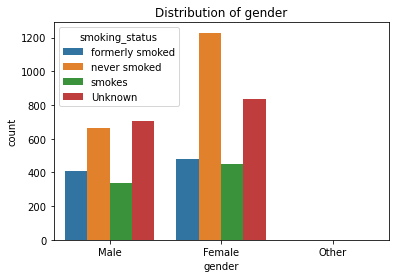

In [4]:
sns.countplot(x='gender',hue='smoking_status' ,data = healthcare_data_no_missing1)
plt.title('Distribution of gender')

Text(0.5, 1.0, 'Distribution of gender')

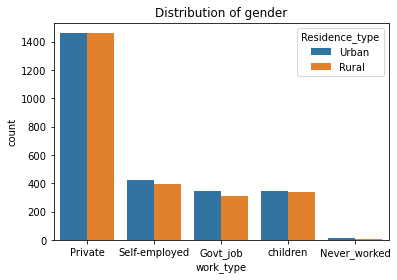

In [5]:
sns.countplot(x='work_type',hue='Residence_type' ,data = healthcare_data_no_missing1)
plt.title('Distribution of gender')

Text(0.5, 1.0, 'Distribution of smoking status')

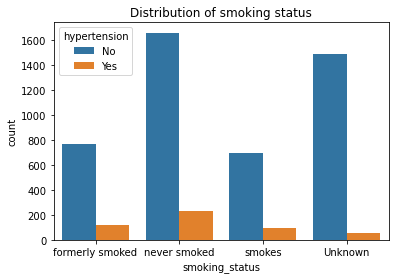

In [12]:
sns.countplot(x='smoking_status',hue='hypertension' ,data = healthcare_data_no_missing1)
plt.title('Distribution of smoking status')

Text(0.5, 1.0, 'Distribution of smoking status')

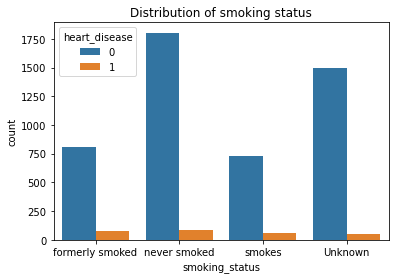

In [13]:
sns.countplot(x='smoking_status',hue='heart_disease' ,data = healthcare_data_no_missing1)
plt.title('Distribution of smoking status')

Text(0.5, 1.0, 'Distribution of working status')

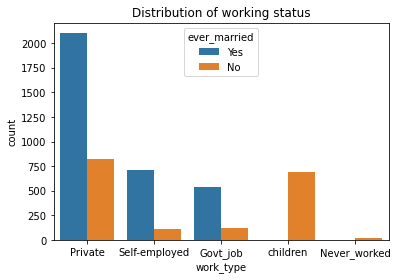

In [14]:
sns.countplot(x='work_type',hue='ever_married' ,data = healthcare_data_no_missing1)
plt.title('Distribution of working status')

Text(0.5, 1.0, 'Distribution of gender status')

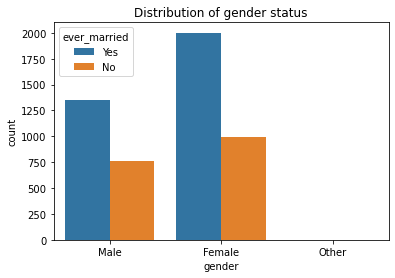

In [17]:
sns.countplot(x='gender' ,hue='ever_married' ,data = healthcare_data_no_missing1)
plt.title('Distribution of gender status')

Text(0.5, 1.0, 'Distribution of smoking status')

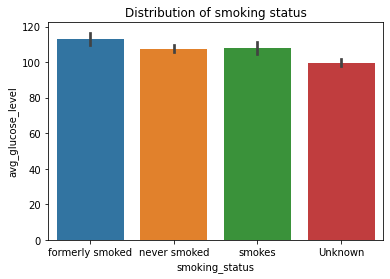

In [13]:
sns.barplot(x='smoking_status',y='avg_glucose_level', data=healthcare_data_no_missing1)
plt.title('Distribution of smoking status')

Text(0.5, 1.0, 'Distribution of gender')

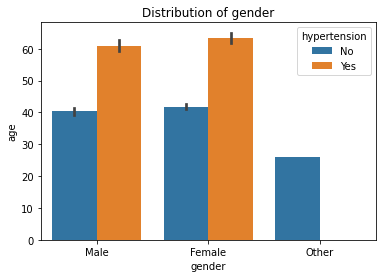

In [19]:
sns.barplot(x='gender',y='age',hue='hypertension' ,data=healthcare_data_no_missing1)
plt.title('Distribution of gender')

Text(0.5, 1.0, 'Distribution of gender')

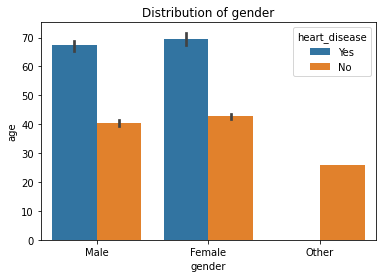

In [20]:
sns.barplot(x='gender',y='age',hue='heart_disease' ,data=healthcare_data_no_missing1)
plt.title('Distribution of gender')

Text(0.5, 1.0, 'Distribution of work status')

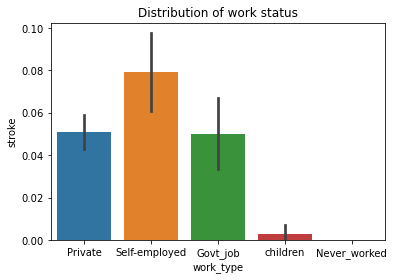

In [21]:
sns.barplot(x='work_type',y='stroke',data=healthcare_data_no_missing1)
plt.title('Distribution of work status')

Text(0.5, 1.0, 'Distribution of work status')

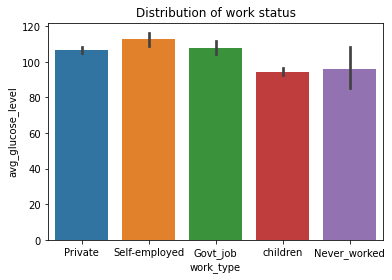

In [22]:
sns.barplot(x='work_type',y='avg_glucose_level',data=healthcare_data_no_missing1)
plt.title('Distribution of work status')

Text(0.5, 1.0, 'Distribution of gender')

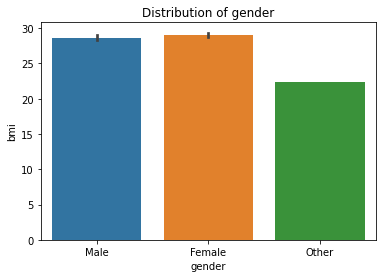

In [23]:
sns.barplot(x='gender',y='bmi',data=healthcare_data_no_missing1)
plt.title('Distribution of gender')

Text(0.5, 1.0, 'Distribution of smoking')

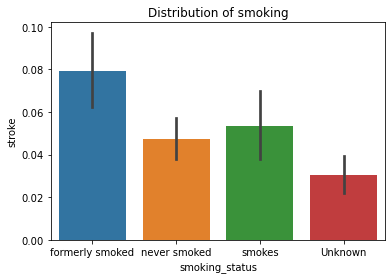

In [24]:
sns.barplot(x='smoking_status',y='stroke',data=healthcare_data_no_missing1)
plt.title('Distribution of smoking')

Text(0.5, 1.0, 'Distribution of marriage')

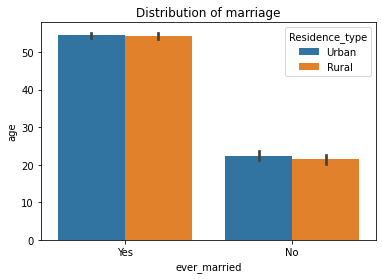

In [26]:
sns.barplot(x='ever_married',y='age',hue='Residence_type' ,data=healthcare_data_no_missing1)
plt.title('Distribution of marriage')

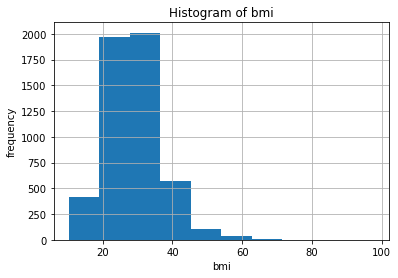

In [29]:
plt.hist(healthcare_data_no_missing1.bmi)
plt.title('Histogram of bmi')
plt.xlabel('bmi')
plt.ylabel('frequency')
plt.grid()

{'whiskers': [<matplotlib.lines.Line2D at 0x1e5ee614f10>,
 'caps': [<matplotlib.lines.Line2D at 0x1e5ee623610>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e5ee614bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e5ee623cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e5ee62f070>],
 'means': []}

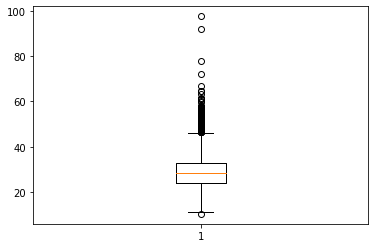

In [30]:
plt.boxplot(healthcare_data_no_missing1.bmi)

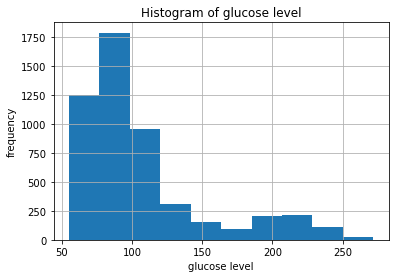

In [31]:
plt.hist(healthcare_data_no_missing1.avg_glucose_level)
plt.title('Histogram of glucose level')
plt.xlabel('glucose level')
plt.ylabel('frequency')
plt.grid()

{'whiskers': [<matplotlib.lines.Line2D at 0x1e5ee6f85e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e5ee6f8ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e5ee6f8280>],
 'medians': [<matplotlib.lines.Line2D at 0x1e5ee7023a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e5ee702700>],
 'means': []}

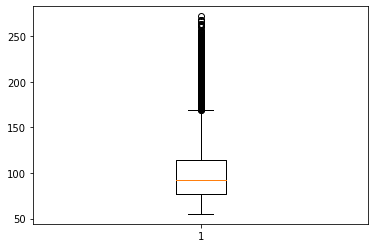

In [32]:
plt.boxplot(healthcare_data_no_missing1.avg_glucose_level)

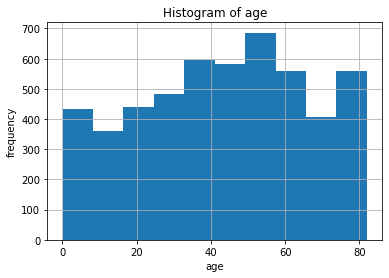

In [33]:
plt.hist(healthcare_data_no_missing1.age)
plt.title('Histogram of age')
plt.xlabel('age')
plt.ylabel('frequency')
plt.grid()

{'whiskers': [<matplotlib.lines.Line2D at 0x1e5ee7c2c10>,
 'caps': [<matplotlib.lines.Line2D at 0x1e5ee7d0310>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e5ee7c28b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e5ee7d09d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e5ee7d0d30>],
 'means': []}

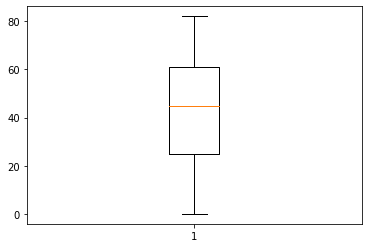

In [34]:
plt.boxplot(healthcare_data_no_missing1.age)

<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

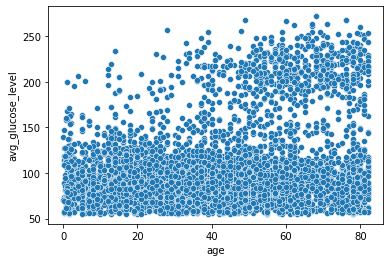

In [42]:
sns.scatterplot(x='age', y='avg_glucose_level' , data=healthcare_data_no_missing1)

<AxesSubplot:xlabel='age', ylabel='bmi'>

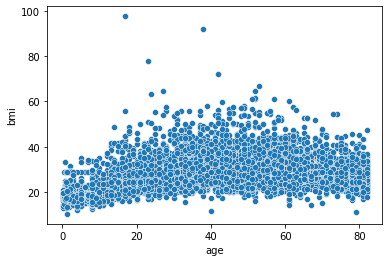

In [43]:
sns.scatterplot(x='age', y='bmi' , data=healthcare_data_no_missing1)

<AxesSubplot:>

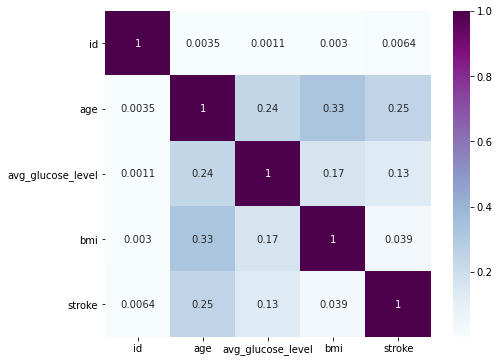

In [44]:
matrix = healthcare_data_no_missing1.corr()
fig = plt.figure(figsize=(8,6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=True)

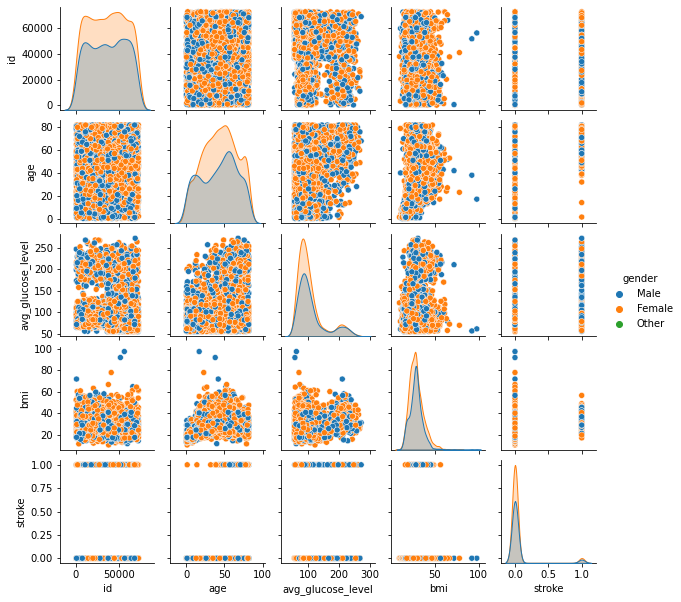

In [45]:
sns.pairplot(healthcare_data_no_missing1, hue='gender', height=1.7)